# S03 T01: Visualització gràfica d'un dataset
**Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.**

## Exercici 1
**Resumeix gràficament el data set DelayedFlights.csv**

**Crea almenys una visualització per:**

* **Una variable categòrica (UniqueCarrier)**
* **Una variable numèrica (ArrDelay)**
* **Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**
* **Dues variables numèriques (ArrDelay i DepDelay)**
* **Tres variables (ArrDelay, DepDelay i UniqueCarrier)**
* **Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).**

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv("DelayedFlights.csv", index_col=0);

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


We get some initial information about the columns, type of each column and a view of the data

In [243]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [244]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [245]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


**Visualització de una variable categòrica (UniqueCarrier)**

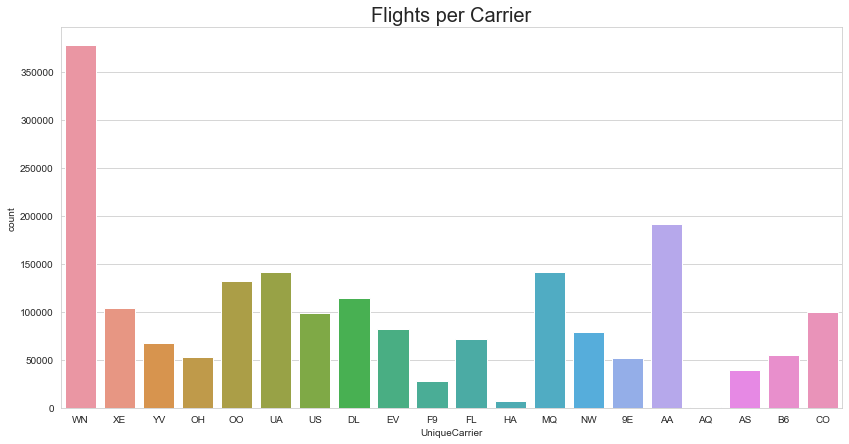

In [246]:
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")

sns.countplot(data=df, x = 'UniqueCarrier')
plt.title('Flights per Carrier', size=20);
plt.savefig('FlightsPerCarrier.png', dpi=300, bbox_inches='tight')

_Conclusion:_ Airline with more flights is WN

**Una variable numèrica (ArrDelay)**


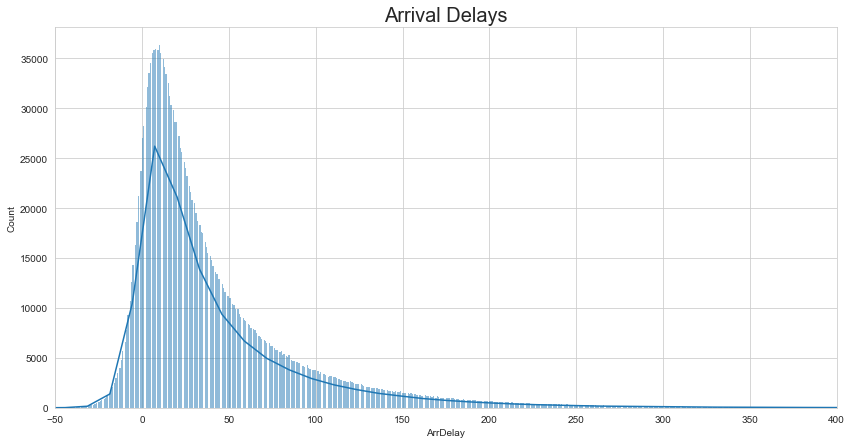

In [247]:
plt.figure(figsize=(14,7))
sns.histplot(df.ArrDelay, kde='True')
plt.title('Arrival Delays', size=20)
plt.xlim(-50,400);
plt.savefig('ArrivalDelays.png', dpi=300, bbox_inches='tight')

_Conclusion:_ Most of the flights have short delays.

**Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**


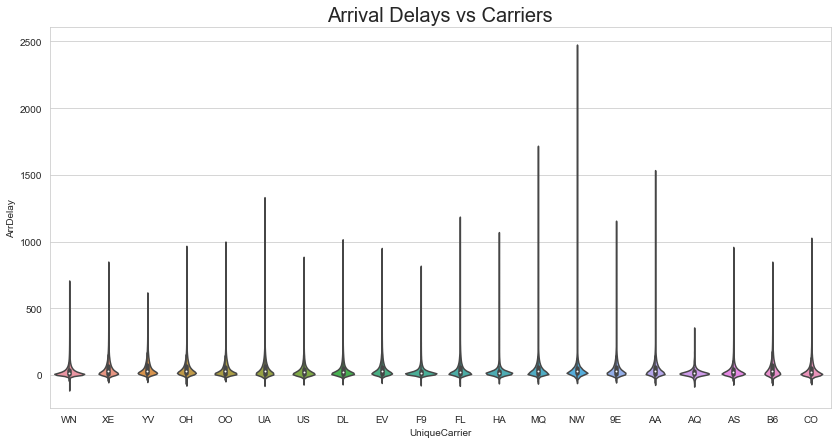

In [248]:
plt.figure(figsize=(14,7))
sns.violinplot(data=df, x='UniqueCarrier', y='ArrDelay')
plt.title('Arrival Delays vs Carriers', size=20);
plt.savefig('ArrivalDelaysPerCarrier.png', dpi=300, bbox_inches='tight')

_Conclusion:_ Longest delay was by carrier NW.

Carriers WN, F9 and AQ, are the ones with more short delays.

**Dues variables numèriques (ArrDelay i DepDelay)**


We do the mean of Delays by Carrier to check their correlation.

In [249]:
df_delay_mean = df.loc[:, ('UniqueCarrier', 'ArrDelay', 'DepDelay')]
df_delay_mean = df_delay_mean.groupby(['UniqueCarrier']).mean()

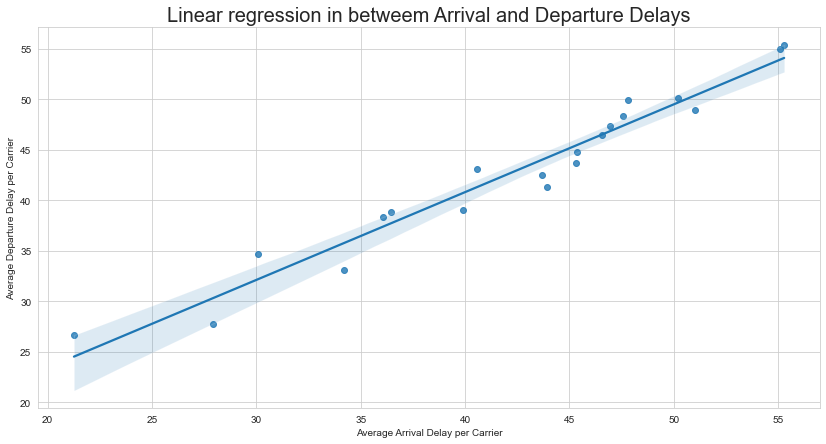

In [250]:
plt.figure(figsize=(14,7))
sns.regplot(data=df_delay_mean, x='ArrDelay', y='DepDelay')
plt.title('Linear regression in betweem Arrival and Departure Delays', size=20)
plt.xlabel('Average Arrival Delay per Carrier')
plt.ylabel('Average Departure Delay per Carrier');
plt.savefig('DelaysRelation.png', dpi=300, bbox_inches='tight')

_Conclusion:_ As expected there is a good correlation in between the flights that departure late and arrive late.

**Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

In [251]:
#We create a new data frame with the delay type in a single column to use hue in the bar plot
df_Arrival = df.loc[:, ('UniqueCarrier', 'ArrDelay')]
df_Arrival.rename(columns={'ArrDelay': 'Delay'}, inplace=True)
df_Arrival['DelayType'] = 'Arrival'
df_Departure = df.loc[:, ('UniqueCarrier', 'DepDelay')]
df_Departure.rename(columns={'DepDelay': 'Delay'}, inplace=True)
df_Departure['DelayType'] = 'Departure'

df_Delay = df_Arrival.append(df_Departure)


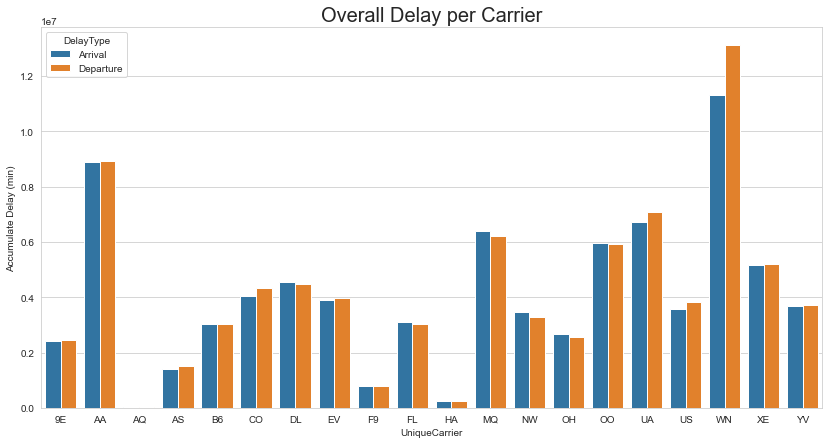

In [252]:
df_Delay_group = df_Delay.groupby(['UniqueCarrier', 'DelayType'], as_index=False).sum()

plt.figure(figsize=(14,7))
sns.barplot(data=df_Delay_group, x='UniqueCarrier', y= 'Delay', hue= 'DelayType')
plt.title('Overall Delay per Carrier', size=20)
plt.ylabel('Accumulate Delay (min)');
plt.savefig('OverallDelayPerCarrier.png', dpi=300, bbox_inches='tight')

_Conclusion:_ Carrier WN, manage to reduce the delays during flights.

**Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)**

We divide the AirTime data into 4 groups to analyse if the flight duration is related to the delays.
 * Group A - From minimum AirTime to Quantile 25%
 * Group B - From Quantile 25% to 50%
 * Group C - From Quantile 50% to 75%
 * Group D - From Quantile 75% to max

In [253]:
df_3var = df.loc[:, ('UniqueCarrier', 'ArrDelay', 'AirTime')]
df_3var = df_3var.dropna()

df_3var2 = df.loc[:, ('UniqueCarrier', 'DepDelay', 'AirTime')]
df_3var2 = df_3var2.dropna()

In [254]:
conditions = [
    (df_3var['AirTime'] <= df_3var['AirTime'].quantile(0.25)),
    (df_3var['AirTime'] > df_3var['AirTime'].quantile(0.25)) & (df_3var['AirTime'] <= df_3var['AirTime'].quantile(0.5)),
    (df_3var['AirTime'] > df_3var['AirTime'].quantile(0.5)) & (df_3var['AirTime'] <= df_3var['AirTime'].quantile(0.75)),
    (df_3var['AirTime'] > df_3var['AirTime'].quantile(0.75))
    ]

groups = ['A', 'B', 'C', 'D']
       
df_3var['Group'] = np.select(conditions, groups)    

In [255]:
conditions = [
    (df_3var2['AirTime'] <= df_3var2['AirTime'].quantile(0.25)),
    (df_3var2['AirTime'] > df_3var2['AirTime'].quantile(0.25)) & (df_3var2['AirTime'] <= df_3var2['AirTime'].quantile(0.5)),
    (df_3var2['AirTime'] > df_3var2['AirTime'].quantile(0.5)) & (df_3var2['AirTime'] <= df_3var2['AirTime'].quantile(0.75)),
    (df_3var2['AirTime'] > df_3var2['AirTime'].quantile(0.75))
     ]

groups = ['A', 'B', 'C', 'D']
       
df_3var2['Group'] = np.select(conditions, groups)  

In [256]:
df_3v_group = df_3var.groupby(['Group', 'UniqueCarrier'], as_index=False).mean()

In [257]:
df_3v2_group2 = df_3var2.groupby(['Group', 'UniqueCarrier'], as_index=False).mean()

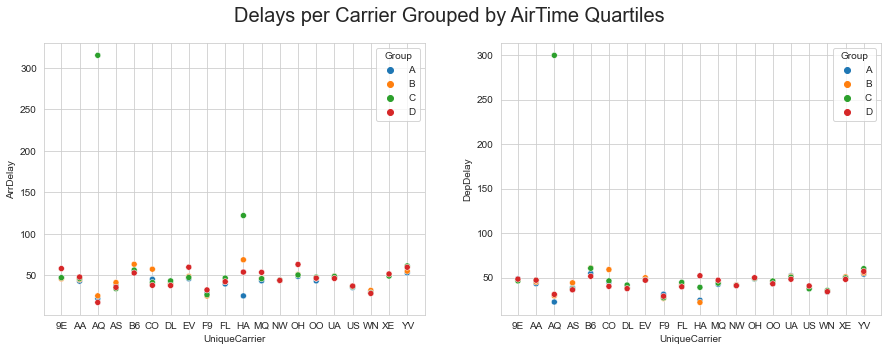

In [258]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Delays per Carrier Grouped by AirTime Quartiles', size=20)
sns.scatterplot (ax=ax1, data=df_3v_group, x='UniqueCarrier', y='ArrDelay', hue='Group')
sns.scatterplot (ax=ax2, data=df_3v2_group2, x='UniqueCarrier', y='DepDelay', hue='Group');
plt.savefig('DelayPerCarrierVsAirTime.png', dpi=300, bbox_inches='tight')

We check if the high value on Group C Carrier AQ. 

In [259]:
df_3var.loc[(df_3var['UniqueCarrier']== 'AQ')].describe()

,ArrDelay,AirTime
count,744.000000,744.000000
mean,21.255376,114.818548
std,35.179935,126.057553
min,-68.000000,10.000000
25%,6.000000,24.000000
50%,13.000000,35.000000
75%,27.250000,279.000000
max,338.000000,367.000000


In [260]:
df_3var.loc[(df_3var['Group']== 'C') & (df_3var['UniqueCarrier']=='AQ')]

,UniqueCarrier,ArrDelay,AirTime,Group
533161,AQ,315.0,92.0,C


We notice that despite that mean of ArrDelays of AQ being 21min, the Group C (AirTime in between quartiles 50% and 75%) only have one flight with a delay of 315min.

_Conclusion:_ There is no clear relation in between the Airtime and the Delays.

## Exercici 2
**Exporta els gràfics com imatges o com html.**

The graphs are saved when they are generated

## Exercici 3
**Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.**

OK, graphs will be upload into S02T05.